In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [3]:
data = pd.read_excel('https://drive.google.com/uc?export=download&id=1sZpkes7wWCcym1zjRl2PdoZM5RQ4TJz2')
data.head()

,Monday,Tuesday,Wednesday,Thursday,Date,Stormy,Mixed,LogPrice,LogQuantity,Rainy,Cold,Windspeed,Windspeed2
0,1,0,0,0,911202,1,0,-0.430783,8.994421,1,0,2.995732,8.974412
1,0,1,0,0,911203,1,0,0.000000,7.707063,0,0,2.995732,8.974412
2,0,0,1,0,911204,0,1,0.072321,8.350194,1,1,2.813411,7.915280
3,0,0,0,1,911205,1,0,0.247139,8.656955,0,1,3.036554,9.220662
4,0,0,0,0,911206,1,0,0.664327,7.844241,0,1,3.036554,9.220662


In [4]:
data.describe()

,Monday,Tuesday,Wednesday,Thursday,Date,Stormy,Mixed,LogPrice,LogQuantity,Rainy,Cold,Windspeed,Windspeed2
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,0.189189,0.207207,0.189189,0.207207,918566.675676,0.288288,0.306306,-0.193681,8.523430,0.162162,0.504505,2.862695,8.238159
std,0.393435,0.407143,0.393435,0.407143,3568.817767,0.455020,0.463049,0.381935,0.741672,0.370271,0.502247,0.208632,1.208728
min,0.000000,0.000000,0.000000,0.000000,911202.000000,0.000000,0.000000,-1.107745,6.194406,0.000000,0.000000,2.456736,6.035551
25%,0.000000,0.000000,0.000000,0.000000,920111.500000,0.000000,0.000000,-0.479651,8.147429,0.000000,0.000000,2.708050,7.333536
50%,0.000000,0.000000,0.000000,0.000000,920220.000000,0.000000,0.000000,-0.206514,8.621193,0.000000,1.000000,2.862201,8.192194
75%,0.000000,0.000000,0.000000,0.000000,920330.500000,1.000000,1.000000,0.163000,9.035391,0.000000,1.000000,2.995732,8.974412
max,1.000000,1.000000,1.000000,1.000000,920508.000000,1.000000,1.000000,0.664327,9.981374,1.000000,1.000000,3.401197,11.568140


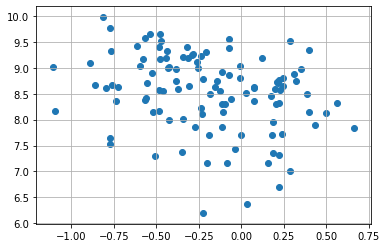

In [5]:
plt.scatter(data['LogPrice'], data['LogQuantity'])
plt.grid(True)
plt.show()

In [7]:
#Regress log quantity on log price
formula = 'LogQuantity ~ LogPrice + Monday + Tuesday + Wednesday + Thursday'
results = smf.ols(formula, data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            LogQuantity   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     5.940
Date:                Thu, 23 Jan 2020   Prob (F-statistic):           7.08e-05
Time:                        18:22:23   Log-Likelihood:                -110.00
No. Observations:                 111   AIC:                             232.0
Df Residuals:                     105   BIC:                             248.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.6069      0.143     60.170      0.0

## Test for heteroscedasticity

In [0]:
#Plot residuals
#practice

### Breusch-Pagan test for heteroscedasticity

We use the het_breuschpagan from Statsmodel library. The aim of this function is to test the hypothesis that the residual variance does not depend on functions (higher order powers or multiplicative combinations) of the explanatory variables, thus requiring two essential inputs: ’residuals’ and ’exogenous variables’.

There are four outputs in total produced by this function: a Lagrange multiplier statistic, p-value, F-test statistic value and F-test p-value. Note that the het_breuschpagan tests the hypothesis in two ways. The first method is to employ the generic formula for an LM test using n*R2 (the number of observations times the auxiliary regression), while the F-statistic is preferable when samples are small or moderately large since otherwise the test exaggerates the statistical significance. To better present the two test results, we finally create a list with four names and link them to each statistic.

In [0]:
from statsmodels.compat import lzip

name = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(results.resid, results.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 3.100934217973111),
 ('p-value', 0.6844280951037658),
 ('f-value', 0.6035234698786652),
 ('f p-value', 0.6973283299552007)]

As you can see from the p-values, both tests lead to the conclusion that there does not seem to be a serious problem of heteroscedastic errors for our model with the p-values both being close to 0.7, respectively.

### White’s modified standard error estimates

In [9]:
###for practice
#hint: use fit cov_type='HC1'

                            OLS Regression Results                            
Dep. Variable:            LogQuantity   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     9.401
Date:                Thu, 23 Jan 2020   Prob (F-statistic):           1.99e-07
Time:                        18:25:48   Log-Likelihood:                -110.00
No. Observations:                 111   AIC:                             232.0
Df Residuals:                     105   BIC:                             248.3
Df Model:                           5                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.6069      0.118     72.745      0.0

## Test for serial correlation

In [0]:
#Durbin-Watson Test

formula = 'LogQuantity ~ LogPrice + Monday + Tuesday + Wednesday + Thursday'
results = smf.ols(formula, data).fit()
sms.stattools.durbin_watson(results.resid, axis=0)

1.4869977867095705

The test statistic is approximately equal to 2*(1-r) where r is the sample autocorrelation of the residuals. Thus, for r=0, indicating no serial correlation, the test statistic equals 2. This statistic will always be between 0 and 4. The closer to 0 the statistic, the more evidence for positive serial correlation. The closer to 4, the more evidence for negative serial correlation.

## The RESET test for functional form

In [0]:
from statsmodels.stats.outliers_influence import reset_ramsey

In [13]:
#Import the reset_ramsey function from the statsmodels.stats.outliers_influence module

formula = 'LogQuantity ~ LogPrice + Monday + Tuesday + Wednesday + Thursday'
results = smf.ols(formula, data).fit()
reset_ramsey(results, degree=5)


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 3
  'rank is %d' % (J, J_), ValueWarning)


<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[0.7229332]]), p=0.5405866640135131, df_denom=101, df_num=3>

With an F-value of 0.1887 and a corresponding p-value of 0.9038, the RESET test results imply that we cannot reject the null hypothesis that the model has no omitted variables. In other words, we do not find strong evidence that the chosen linear functional form of the model is incorrect.